In [1]:
import pandas as pd
import numpy as np
import newspaper

In [45]:
from textblob import TextBlob

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

In [17]:
from gensim.models import KeyedVectors
# Load vectors directly from the file
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
# Access vectors for specific words with a keyed lookup:
vector = model['easy']
# see the shape of the vector (300,)
vector.shape
# Processing sentences is not as simple as with Spacy:
vectors = [model[x] for x in "This is some text I am processing with Spacy".split(' ')]

In [10]:
import pickle

In [8]:
all_sum_nyt = [article.summary for article in all_texts_nyt]
all_sum_wsj = [article.summary for article in all_texts_wsj]

In [11]:
pickle.dump(all_sum_nyt, open("nyt_covid_sum.pkl", "wb+"))
pickle.dump(all_sum_wsj, open("wsj_covid_sum.pkl", "wb+"))
pickle.dump(all_times_nyt, open("nyt_covid_times.pkl", "wb+"))
pickle.dump(all_times_wsj, open("wsj_covid_times.pkl", "wb+"))

In [110]:
len(all_texts_nyt)

1737

In [169]:
data = pd.read_csv("WSJ_h1n1.csv").sort_values('created_at').drop_duplicates()
all_texts_wsj_h1n1 = []
all_texts_nyt_h1n1 = []
all_times_wsj_h1n1 = []
all_times_nyt_h1n1 = []

In [170]:
for tweet, date, created_at in data[["tweet", "date", "created_at"]].values:
    if "http" not in tweet:
        continue
    if all(x not in tweet for x in ["virus", "h1n1", "WHO", "flu", "swine", "pandemic", "epidemia"]):
        continue
    try:
        url_start = tweet.find("http")
        url_end = tweet.find(" ", url_start)
        url = tweet[url_start : url_end]
        print(tweet, date)
        article = newspaper.Article(url)
        article.download()
        article.parse()
        article.nlp()
        all_texts_wsj_h1n1.append(article)
        all_times_wsj_h1n1.append(created_at)
#         testimonial = TextBlob(article.summary)
#         result.append([testimonial.sentiment.polarity, testimonial.sentiment.subjectivity])
    except KeyboardInterrupt:
        raise
    except:
        pass

Afghan War Hinges on Farflung Outposts  http://bit.ly/FP1Q 2009-03-04
RT @alansmurray Follow latest news on swine flu from all sources at this "news tracker":  http://bit.ly/h7Vo9 2009-04-27
BREAKING NEWS: The CDC's acting director has confirmed the first death in the U.S. from swine flu.  http://tinyurl.com/dasxkk 2009-04-29
BREAKING NEWS: Hong Kong reports first confirmed case of H1N1 flu in visitor from Mexico.  http://tinyurl.com/c6tmp9 2009-05-01
BREAKING NEWS: LIVE BLOG: CDC update on the flu.  http://tinyurl.com/ckdxz8 2009-05-01
BREAKING NEWS: Mexico says no new A/H1N1 flu deaths Saturday.  http://tinyurl.com/czj59o 2009-05-02
BREAKING NEWS: LIVE BLOG: WHO director-general: 'This virus is entirely new and it is spreading ea..  http://tinyurl.com/nww7em 2009-06-11
Wind Farms Set Wall Street Aflutter  http://bit.ly/1zlFdU 2009-08-31
BREAKING NEWS: LIVE BLOG: Head of CDC giving update on H1N1 virus  http://tinyurl.com/l9d79w 2009-09-03
NEWSMAKERS 2009: Vote for the most influentia

In [5]:
data = pd.read_csv("WSJ_covid.csv").sort_values('created_at')

In [6]:
for tweet, date, created_at in data[["tweet", "date", "created_at"]].values:
    if "http" not in tweet:
        continue
    if all(x not in tweet for x in ["virus", "corona", "WHO", "covid", "ncov", "wuhan"]):
        continue
    try:
        url_start = tweet.find("http")
        url_end = tweet.find(" ", url_start)
        url = tweet[url_start : url_end]
        print(tweet, date)
        article = newspaper.Article(url)
        article.download()
        article.parse()
        article.nlp()
        all_texts_wsj.append(article)
        all_times_wsj.append(created_at)
#         testimonial = TextBlob(article.summary)
#         result.append([testimonial.sentiment.polarity, testimonial.sentiment.subjectivity])
    except KeyboardInterrupt:
        raise
    except:
        pass

Five New Jersey political figures have been charged with taking thousands of dollars in bribes after a public-corruption investigation uncovered illegal payoffs delivered in envelopes, paper bags and a coffee cup, officials said https://on.wsj.com/35DPsx3  2019-12-20
Health officials expand efforts to prevent highly contagious virus spreading to more Pacific islands after deadly outbreak in Samoa https://on.wsj.com/2rkQ1Nz  2019-12-23
Chinese scientists investigating a mystery illness that has sickened dozens in Central China have discovered a new strain of coronavirus https://on.wsj.com/2Fvucyn  2020-01-09
In the archives of Dorothea Lange, the great documentarian of the Depression-era American West, artist Sam Contis uncovered a trove of unseen work https://on.wsj.com/2T8lWvV  2020-01-09
China’s experience with the SARS epidemic and what appears to be a less virulent virus have helped Beijing in containing the threat of a new viral outbreak https://on.wsj.com/2uyc0Sd  2020-01-11
The 

Wuhan has built dozens of new hospitals in recent years. But it's struggling to handle the coronavirus outbreak, which is still straining its resources. Supplies are running low. https://on.wsj.com/2TVO326  2020-01-25
A doctor who worked at a hospital in Wuhan, where coronavirus patients are being treated, died Saturday morning. The pneumonia-causing virus has so far claimed the lives of more than 40 people while infecting more than 1,200 others https://on.wsj.com/36uiuid  2020-01-25
The U.S. is planning to evacuate Americans from the Chinese city at the center of the coronavirus outbreak, says a person familiar with the matter https://on.wsj.com/2tP0IsU  2020-01-25
“We don’t know how infectious it is, we don’t know how severe it is, and we don’t know how it’s spreading.” China’s coronavirus response is troubled. https://on.wsj.com/2OcU8Uf  2020-01-25
The U.S. is planning to evacuate Americans from the Chinese city at the center of the coronavirus outbreak, says a person familiar with 

Criticism of China’s handling of the coronavirus outbreak is breaking through its censorship machine, prompting Beijing to work harder to squelch dissent https://on.wsj.com/37zxZHd  2020-01-29
From @WSJopinion: The coronavirus outbreak proves it’s time to close China’s “wet markets” once and for all, write Christian Walzer and Aili Kang https://on.wsj.com/2O6Gule  2020-01-29
Deserted streets. Closed shops. Wuhan, the city at the center of a deadly coronavirus outbreak, looks like a ghost town. https://on.wsj.com/2uIfotL  2020-01-29
British Airways cancels all flights to and from mainland China as coronavirus spreads and governments begin evacuating citizens https://on.wsj.com/36CkVzB  2020-01-29
Hong Kong-listed stocks fall sharply as investors assess the impact of coronavirus: "More and more questions are being asked about the economic consequences,” says a strategist https://on.wsj.com/314AMpo  2020-01-29
Australia wants to save its citizens in the Chinese city of Wuhan from the coro

Studies say the new coronavirus appears to be more contagious than seasonal flu https://on.wsj.com/3b7oEs7  2020-02-03
Medical experts say the effectiveness of masks at preventing the spread of the coronavirus is limited https://on.wsj.com/38TsgMG  2020-02-03
U.S. stocks have mostly shaken off coronavirus fears. But are investors just being complacent? https://on.wsj.com/2OjkgMT  2020-02-03
Chinese markets had a decidedly bad day but others seem to have priced in emerging coronavirus risks https://on.wsj.com/31lyGl8  2020-02-03
“We don’t know what to do. Our employees are panicking.” Coronavirus uncertainty has forced global companies to recall executives, shutter stores, reconfigure supply lines.  https://on.wsj.com/31kiuk1  2020-02-03
The rapid construction of a hospital to treat patients at the resource-strained center of China’s coronavirus outbreak was completed Sunday, as the number of infected people passed 17,000 https://on.wsj.com/2vMbuAP  2020-02-03
Saudi Arabia is pushing fo

Scientists tracking coronavirus said the likely source is bats, underscoring the risks associated with humans’ push into the habitats of wild animals https://on.wsj.com/2UvJc88  2020-02-06
U.S. travel restrictions are “certainly not a gesture of goodwill,” China’s foreign ministry says, playing down American aid in combating the coronavirus outbreak https://on.wsj.com/2SnbzTc  2020-02-06
A Chinese doctor who was among the first to flag the existence of the coronavirus now spreading around the world has died, the hospital says https://on.wsj.com/39iIvmJ  2020-02-06
Heard on the Street: Viewed through an economic prism, the coronavirus’s impact could be more severe than markets realize https://on.wsj.com/2UuWf9O  2020-02-06
People are scrambling to figure out the coronavirus’s economic impact. The actions of the healthy may sway the numbers more than the sick, @jdlahart explains. #WSJWhatsNow  https://on.wsj.com/2ugRENT  pic.twitter.com/8ghETehajZ 2020-02-07
Artificial intelligence is he

The coronavirus outbreak is causing cruise lines to offer big bargains this month. However, @WSJheard explains why investors tempted by their discounted shares should stay anchored. #WSJWhatsNow  https://on.wsj.com/2SgljQj  pic.twitter.com/tbPJazXQQr 2020-02-12
From @WSJopinion: A public pronouncement on the coronavirus is the latest in a list of dubious scientific assertions made by Hindu nationalists, writes @tunkuv https://on.wsj.com/2tNvZfM  2020-02-12
Heard on the Street: Some of Wall Street’s reassuring statements about coronavirus could be wildly off, and so, too, their expectations of the economic disruption the virus could cause https://on.wsj.com/38ntwHS  2020-02-12
Coronavirus fears are prompting companies including Amazon, Intel, Sony and Lockheed Martin to skip major industry gatherings https://on.wsj.com/38rrTcw  2020-02-12
The Fed chairman's Senate testimony comes after he told a House committee that the central bank is closely monitoring the coronavirus https://on.wsj.c

The fast-spreading coronavirus is prompting a rethink of the most basic form of business etiquette https://on.wsj.com/2uDUGMh  2020-02-16
Some American passengers on a coronavirus-stricken cruise ship arrived at a Tokyo airport for flights to the U.S., where they will have to serve out an additional 14-day quarantine https://on.wsj.com/2Sxq7ko  2020-02-16
Chinese shares have recouped their post-Lunar New Year losses, suggesting growing confidence the coronavirus will only deal a temporary blow to growth https://on.wsj.com/38AqjVE  2020-02-17
Economists fear that the impact of the coronavirus could push Japan into technical recession https://on.wsj.com/39HBtYU  2020-02-17
Hundreds of Americans who had been passengers on a coronavirus-stricken cruise ship in Japan landed in the U.S. on Monday, including 14 people who tested positive for the virus https://on.wsj.com/2wjz5ZO  2020-02-17
Passengers and crew on a cruise ship docked in Cambodia are being tested after an American passenger who

A Marine band played patriotic marches and jazz classics for evacuees in the U.S. coronavirus quarantine. "That was the weirdest concert I’ve ever been to.” https://on.wsj.com/2SZU8bE  2020-02-21
Kickball. Fashion shows. Band concerts. How evacuees are passing time in the U.S. coronavirus quarantine. https://on.wsj.com/38WOH3K  2020-02-21
Heard on the Street: To gauge the extent of the coronavirus damage to China's economy, watch how many people are actually going back to work https://on.wsj.com/2V7L9YA  2020-02-21
“You would think we would be insulated.” Small U.S. businesses are getting squeezed as the coronavirus stalls China’s factories. https://on.wsj.com/37PCJaS  2020-02-21
Organizers of the Tokyo Marathon cut more than 30,000 public runners from the race, citing concerns about the spread of the Covid-19 virus https://on.wsj.com/2Pg0m6e  2020-02-21
Prisons emerged as a new flashpoint in the fast-spreading coronavirus as three Chinese provinces reported outbreaks at penitentiaries

The potential for a global coronavirus outbreak is again putting the Federal Reserve in a delicate spot. https://on.wsj.com/3c36YP0  2020-02-25
Heard on the Street: The coronavirus epidemic threatens to derail a nascent recovery in the memory-chip industry https://on.wsj.com/2TfgdCZ  2020-02-25
Coronavirus infections grow in Italy as experts warn that the global spread of the illness is approaching a tipping point https://on.wsj.com/2Pp4TDo  2020-02-25
The number of people killed by coronavirus in Iran has risen to at least 15, with nearly 100 cases of the infection confirmed, including deputy health minister, Iraj Harirchi, who is in charge of containing the spread of the pathogen https://on.wsj.com/2Thlav0  2020-02-25
Breaking: Federal health authorities said they now expect a wider spread of the new coronavirus in the U.S. and are preparing for a potential pandemic https://on.wsj.com/2wPtGKx  2020-02-25
The 10-year Treasury yield hit a record low and the Dow fell more than 700 point

Starbucks says it has reopened hundreds of its China stores that closed in response to the coronavirus outbreak https://on.wsj.com/383iRRN  2020-02-27
The White House is taking steps to better coordinate messaging on the coronavirus outbreak, instructing senior officials to seek approval from Vice President Mike Pence’s office before speaking publicly about the epidemic https://on.wsj.com/2VqFBsa  2020-02-27
Investors expect the Fed will step in and cut rates to help cushion the economic effects of the coronavirus epidemic. @jdlahart explains why doing so won’t help much at the moment, but it’s worth a try. #WSJWhatsNow  https://on.wsj.com/37YKviU  pic.twitter.com/4zAxtE0ug9 2020-02-28
From @WSJopinion: The novel coronavirus is a threat to the global economy. U.S. central bankers should lead a global response, writes Kevin Warsh. https://on.wsj.com/2TkyrTF  2020-02-28
The rapid spread of the coronavirus outside China spurred turmoil in financial markets this week. Investors say hedging

China said the number of people in the country who have recovered from the coronavirus now exceeds the number of those confirmed to still have it https://on.wsj.com/39bNAxk  2020-02-29
South Korea reported more than 800 new coronavirus cases on Saturday, the most of any country caught up in the epidemic  https://on.wsj.com/3acXiQe  2020-02-29
Makers of some “symptom checker” chatbots and similar health services are struggling to update their products’ algorithms to respond to the coronavirus epidemic https://on.wsj.com/3agPWeq  2020-02-29
Should I avoid flying? A Q&A for travelers worried about coronavirus https://on.wsj.com/2I9b2Qa  2020-02-29
The FDA will allow some labs to begin immediate coronavirus exams, in a rapid expansion of U.S. testing capability https://on.wsj.com/38b0A4U  2020-02-29
In the U.S., health officials in California, Oregon and Washington reported three new cases of coronavirus with no travel history to China https://on.wsj.com/2Tbfrs7  2020-02-29
Breaking: Washi

Two individuals from a private Rhode Island high school who went on a school trip to Europe in mid-February tested positive for the novel coronavirus, the state health department said https://on.wsj.com/32I3CwF  2020-03-03
European governments are divided in their response to the coronavirus, as they seek to balance protecting public health with economic disruption. https://on.wsj.com/3arN6DL  2020-03-03
With coronavirus infections rising, Iran mobilizes 300,000 teams and deploys drones and water cannon to slow the spread of the disease https://on.wsj.com/32JL4vP  2020-03-03
South Korean officials say that more than half of all its coronavirus cases are linked to a mysterious church in Daegu. Here’s how the church’s secretive practices may have jeopardized containment efforts. #WSJWhatsNow  https://on.wsj.com/3agerbI  pic.twitter.com/Gg0u7KWqXu 2020-03-03
A majority of economists expect the Bank of Canada to cut its main interest rate this week in response to concerns over the impact o

Apple bet big on China as a manufacturing hub. After coronavirus, tariffs and slumping iPhone sales, it's facing a reckoning. https://on.wsj.com/3anzBor  2020-03-04
South Korea has tested more than 100,000 people for coronavirus. Britain has tested nearly 14,000. Japan, which had initially limited tests, can now run 4,000 tests a day. How governments around the world are trying to gauge the spread of the virus.  https://on.wsj.com/2vEbHGm  2020-03-04
As the new coronavirus spreads around the world, governments are grappling with a difficult question: Who should be tested? https://on.wsj.com/2VHp2Ze  2020-03-04
A spokesman said Pope Francis has a cold, but wouldn’t say whether the pope had been tested for the coronavirus https://on.wsj.com/38iLBpF  2020-03-04
Japanese drugmaker Takeda is trying to develop a coronavirus drug from the blood of patients with antibodies that helped them recover https://on.wsj.com/39niZNy  2020-03-04
Creditors reckon big developers can tough out virus-relate

Asian shares build on a U.S. surge amid signs of coordinated action to counter the economic hit from coronavirus https://on.wsj.com/2wv4Cbk  2020-03-05
Heard on the Street: Investors might be right to bet on government support for the 5G and chip sectors, but wrong to assume no disruptions due to the coronavirus and geopolitics https://on.wsj.com/38m4yb1  2020-03-05
More coronavirus cases are reported globally, from Australia to South Korea, as officials warn it may be impossible to fully contain the pathogen https://on.wsj.com/2VHY0kB  2020-03-05
China is far more mobile than it was during the SARS outbreak in 2003, giving new viruses a ready route to the world at large https://on.wsj.com/39rg6eC  2020-03-05
Coronavirus claims its first big airline as U.K. carrier Flybe enters bankruptcy administration, forcing the cancellation of dozens of flights https://on.wsj.com/32S1SRl  2020-03-05
U.S. stock futures fall, reflecting continued volatility as investors remain jittery about the econ

How many people are infected with coronavirus? Estimates abound, but an accurate number remains elusive https://on.wsj.com/3cDuaUo  2020-03-06
China’s early response to the coronavirus was riddled with errors and delays. “A lot fewer people would have died.” https://on.wsj.com/39u3Dab  2020-03-06
In late January, employees at a German auto supplier started falling ill with the coronavirus. But the company had a plan. https://on.wsj.com/2TqHaoC  2020-03-06
To suppress misinformation about the coronavirus, Facebook has altered its search results, created pop-ups directing users toward public-health authorities and offered the WHO what Chief Executive Mark Zuckerberg called “as many free ads as they need” https://on.wsj.com/3cC4Rlt  2020-03-06
From @WSJopinion:  To counter the economic risks posed by the new coronavirus, Congress should send you $1,000—and another $500 for each of your children—as soon as possible, writes @jasonfurman https://on.wsj.com/2vAiUHO  2020-03-06
President Trump

Hundreds of teams of epidemiologists and statisticians scramble to figure out how far and fast coronavirus will spread and how deadly it could become https://on.wsj.com/331J5mF  2020-03-08
The flu pandemic of 1918 killed more than 50 million people worldwide. The lessons of that outbreak could save countless lives in the fight against the coronavirus, writes global health expert @jonoquick. https://on.wsj.com/2TvfzCI  2020-03-08
An attendee at CPAC, a conference for conservative activists held in late February outside Washington, D.C., has tested positive for coronavirus, the American Conservative Union said https://on.wsj.com/2PQPA6H  2020-03-08
Many retirees depend on the stock market to cover some of their financial needs. So, when the market becomes volatile, as it has amid fear of the coronavirus epidemic, many get nervous. https://on.wsj.com/2vPzhA2  2020-03-08
Hundreds of teams of epidemiologists and statisticians scramble to figure out how far and fast coronavirus will spread a

The flu pandemic of 1918 killed more than 50 million people worldwide. The lessons of that outbreak could save countless lives in the fight against the coronavirus, writes global health expert @jonoquick. https://on.wsj.com/2v55cMA  2020-03-10
Flying in the age coronavirus: 2,000 grounded aircraft, and lots and lots of hand sanitizer. https://on.wsj.com/2wLaCwA  2020-03-10
China botched its early response to the coronavirus, dating back to the very first patients. The result is a global crisis. https://on.wsj.com/3aDtgp2  2020-03-10
Chinese President Xi Jinping makes a surprise visit to Wuhan, his first known trip to the center of the coronavirus epidemic since it began https://on.wsj.com/2TTSysa  2020-03-10
The coronavirus outbreak alters thinking about national-security threats, central-bank powers and dependence on China, writes @GeraldFSeib https://on.wsj.com/2IAPMTE  2020-03-10
Chinese producer prices fell back into deflation territory in February, as the coronavirus epidemic forc

Even as the coronavirus epidemic spread across the U.S., the MLB insisted that it wanted to start its season as scheduled https://on.wsj.com/3aNadJ6  2020-03-11
U.S. availability of coronavirus tests is ramping up, but still not meeting demand https://on.wsj.com/3cOCh0d  2020-03-11
German Chancellor Angela Merkel said up to 70% of the population could get infected with the coronavirus  https://on.wsj.com/3aNDqDG  2020-03-11
The World Health Organization declared the new coronavirus a pandemic https://on.wsj.com/338eBiY  2020-03-11
From @WSJopinion: Russia’s push for lower oil prices gets a boost from the coronavirus demand shock. Can U.S. shale producers survive? asks @DanielYergin https://on.wsj.com/2THWlKr  2020-03-11
Italy’s coronavirus outbreak, the world’s worst outside China, has started to hit the country’s big manufacturers https://on.wsj.com/2U05A7F  2020-03-11
If you need to miss work because of the coronavirus, who pays for sick leave? @juliaccarpenter explains  https://on.w

Breaking: MLB and the NHL suspended play in response to concerns over the coronavirus pandemic https://on.wsj.com/2QaxLzM  2020-03-12
Who pays for your coronavirus test? @juliaccarpenter explains #WSJWhatsNews  https://on.wsj.com/2WbWnvB  pic.twitter.com/EhBxWdCgMZ 2020-03-12
The NCAA canceled its marquee men's and women's basketball tournaments and Disneyland is shutting down. Follow our live coronavirus updates. https://on.wsj.com/2U11HiL  2020-03-12
The lowest mortgage rates on record are colliding with the prospect of an economic downturn prompted by the coronavirus outbreak, setting the stage for an unpredictable spring selling season in the housing market https://on.wsj.com/2Q737Hi  2020-03-13
🎧 Listen: In today's episode of The Journal report, the World Health Organization has made it official: The new coronavirus is a global pandemic. @brabbott42, @margheritamvs and @bzcohen explain how the crisis is rippling through the world. https://on.wsj.com/3cY9R4i  2020-03-13
Should I av

Pelosi says she has reached a deal with the Trump administration on a bill aimed at responding to the coronavirus https://on.wsj.com/2ILhVY6  2020-03-14
🎧 Listen: In today's episode of the Journal podcast, @kenbrown12 explains how, as the coronavirus pandemic threatens the economy and sends stocks tumbling, Saudi Arabia’s crown prince has added to the turmoil by launching an oil price war https://on.wsj.com/39OgJPr  2020-03-14
Keep informed about the latest coronavirus news with the following stories, which are free to read:

• How to navigate the crisis:  https://on.wsj.com/2w3AfZC 

• Symptoms and how to protect yourself:  https://on.wsj.com/2IMMT28 

• Answers to your questions: https://on.wsj.com/2wTzEKk  2020-03-14
The world’s tallest mountain is off-limits to climbers after Nepal and China suspended Mount Everest expeditions to fight the coronavirus https://on.wsj.com/2xCSG83  2020-03-14
Watch: Officials in the U.K., Brazil, Iran and several other countries have tested positive f

Breaking: Fed cuts rates to near zero and will purchase $500 billion in Treasurys, $200 billion in mortgage-backed securities, citing economic disruptions from coronavirus https://on.wsj.com/2J18mVf  2020-03-16
Germany accused the Trump administration of trying to lure a local biotech company working on a vaccine for the novel coronavirus to relocate to the U.S. https://on.wsj.com/3d73GuP  2020-03-16
Breaking: NYC’s public school system—the U.S.'s largest—will close to stem the spread of the coronavirus https://on.wsj.com/2xHJ9N5  2020-03-16
Sneezes and coughs that turn heads. Questions about whether to leave the house. No sports. No hugs. Coronavirus is reshaping American life. https://on.wsj.com/2wUqGwq  2020-03-16
“No virus will ever stop me from working out” https://on.wsj.com/3aHOhiq  2020-03-16
The Census Bureau said Sunday that a field employee has tested positive for the novel coronavirus https://on.wsj.com/2wVjOyK  2020-03-16
Hospitals are cancelling surgeries and moving routi

The new coronavirus couldn’t have come at a worse time for the world’s second-largest operator of movie theaters. @WSJheard explains how its grand consolidation plans may not play out as envisioned. #WSJWhatsNow  https://on.wsj.com/3a1TrWI  pic.twitter.com/pJlmJ8CZh1 2020-03-16
Americans have learned they can’t really count on Washington to deal with the coronavirus for them, writes @GeraldFSeib; governors have been the most effective political leaders in dealing with the crisis https://on.wsj.com/3aZ4csM  2020-03-17
Ohio Gov. Mike DeWine recommended his state postpone its primary election until June 2 because of the coronavirus pandemic, a day before voters were set to go to the polls Tuesday https://on.wsj.com/2U9afnK  2020-03-17
The Department of Veterans Affairs is preparing in case it needs to take on its little-known role as the nation’s backup health-care system, a job that gained urgency when a national emergency was declared over the coronavirus pandemic https://on.wsj.com/2x6

Officials are searching for a woman who gave a false name and address to doctors at a New Jersey hospital before testing positive for the coronavirus https://on.wsj.com/2Qo3AF3  2020-03-18
Our chief economics commentator @greg_ip looks at what the federal government can do about the economic fallout from coronavirus in this week’s Election + Business newsletter https://on.wsj.com/2xF4aI2  2020-03-18
Manufacturers are staggering shifts and installing barriers between workers to keep factories running as the coronavirus disrupts supply chains, staffing and demand https://on.wsj.com/3a2aWpy  2020-03-18
For many voters going to the polls in three states, the trip was their first time out of their homes in days amid the coronavirus pandemic. Some were successful in voting, while others had trouble locating an operating polling site. https://on.wsj.com/38Z3tq6  2020-03-18
🎧 Listen: In today's episode of The Journal podcast, WSJ Editor in Chief @murraymatt explains the economic risks and real

The Senate passed the House's coronavirus relief bill, which will provide free testing and require smaller employers to give two weeks of paid sick leave https://on.wsj.com/2TYbqrc  2020-03-18
The coronavirus pandemic is devastating U.S. restaurant chains. But @Spencerjakab explains why financially stronger companies should see the light of day in the near future. #WSJWhatsNow  https://on.wsj.com/2Qn4dyM  pic.twitter.com/h9CJkFHGe8 2020-03-19
Coronavirus has upended daily life. Here’s a guide to your most pressing questions. https://on.wsj.com/33pXDwT  2020-03-19
European Central Bank announces a new €750 billion bond-buying program to combat coronavirus-related economic slowdown https://on.wsj.com/2ITUiN0  2020-03-19
🎧 Listen: In today's episode of The Journal report, @EricMorath explains which workers are most vulnerable as the coronavirus crisis leads to job cuts in the U.S., and what mass layoffs would mean for the economy https://on.wsj.com/2UgLTIW  2020-03-19
New York City hospit

More people are working from home as the new coronavirus spreads. Here’s how to stay connected to your colleagues from @ChipCutter #WJSWhatsNow  https://on.wsj.com/3b8NKWP  pic.twitter.com/N1lne0UpfB 2020-03-19
A taxi driver steers through silenced streets. A mailman washes his hands dozens of times a day. As coronavirus changes how we work, see how different people are coping with the stresses and risks. https://on.wsj.com/2Ujowyr  2020-03-19
Because not all children have internet access, online work won’t count at schools closed for coronavirus pandemic https://on.wsj.com/2wlOpFM  2020-03-19
You can still golf during coronavirus, but there are new rules: Rake the bunkers with your feet. Leave the flagsticks in. Don't shake hands after the round. https://on.wsj.com/396JgP4  2020-03-20
New Orleans Saints head coach Sean Payton has tested positive for the coronavirus, becoming the first known case inside the NFL. https://on.wsj.com/3a3VhpL  2020-03-20
The coronavirus pandemic is halting

Decades-old antimalarial drugs have shown early promise in treating patients infected with the disease caused by the new coronavirus, as they work to repurpose existing therapies in a race to find effective treatments https://on.wsj.com/3bipAJt  2020-03-20
Elon Musk’s contrarian streak built Tesla. Was it tone-deaf in the face of the coronavirus? https://on.wsj.com/39dFEes  2020-03-20
Leaders of the U.S. Olympic & Paralympic Committee on Friday deferred to the IOC on the status of the coronavirus-imperiled Tokyo 2020 Olympics https://on.wsj.com/2UnofKF  2020-03-20
After this coronavirus crisis fades away, will cruise lines stay afloat? @Spencerjakab explains how their future remains unclear for the time being. #WSJWhatsNow  https://on.wsj.com/2wobYxy  pic.twitter.com/9u46Cfye1e 2020-03-20
The U.S. and Mexico have agreed to curtail travel across their roughly 2,000-mile border, allowing trade and workers to continue crossing but limiting most other travel amid the new coronavirus pandem

FEMA has responded to hurricanes, floods, tornadoes and wildfires, with mixed results. Its newest challenge: the huge public-health emergency of coronavirus. https://on.wsj.com/3a5wQIF  2020-03-22
The coronavirus is pushing sporting events from the real world to the virtual world. @jasongay just competed in one. He was really bad at it. https://on.wsj.com/3basqAn  2020-03-22
Mike and Karen Pence both tested negative for the new coronavirus. They underwent a test after a staff member in the vice president’s office contracted the virus. https://on.wsj.com/2wrItuT  2020-03-22
As coronavirus panic-buying grips Australia, some supermarkets are reserving early-morning hours for senior shoppers https://on.wsj.com/2U3ZK6k  2020-03-22
Elaborate dishes, online pilates, and virtual jam sessions and happy hours: How 300 hundred million Chinese are getting by under coronavirus quarantines and lockdowns https://on.wsj.com/2U5wvQD  2020-03-22
Streets, businesses and transit systems lie deserted in la

U.S. Treasury Secretary Steven Mnuchin said a coronavirus-response bill he is negotiating with Congress doesn’t amount to a corporate bailout, pushing back against Democratic criticism https://on.wsj.com/2wzjRAv  2020-03-23
Now that the door is open to a probable delay in the Summer Olympics because of the coronavirus pandemic, Japan is hoping to keep it short https://on.wsj.com/3aec1Lg  2020-03-23
Sen. Amy Klobuchar’s husband is in the hospital with Covid-19, adding the Minnesota Democrat to the list of lawmakers touched by the coronavirus pandemic https://on.wsj.com/2UdyTVJ  2020-03-23
The day the Life Care Center of Kirkland went into scrub-down mode, it threw a Mardi Gras party. The coronavirus took hold and never let go. (Corrects an earlier tweet, which has been deleted, that misstated the day of the party)  https://on.wsj.com/3do5pMi  pic.twitter.com/E1BEqLrvGl 2020-03-23
Boeing said it would suspend production in the Seattle area this week to help curb the spread of the coronav

From @WSJopinion: The Chinese Communist Party’s initial coverup helped get us all into this coronavirus mess. We’ll need the free world’s innovation to get out of it, writes @john_walters_ https://on.wsj.com/3990r2E  2020-03-24
A surge of coronavirus patients has boosted demand for traveling nurses, which represent a small slice of the total nursing workforce https://on.wsj.com/2vLPaHX  2020-03-25
The rate of infection for the novel coronavirus accelerated in New York state and the U.S. surpassed 50,000 confirmed cases as more governments around the world initiated lockdowns to limit the pandemic’s spread  https://on.wsj.com/33Jh4Ri  2020-03-25
Watch live coverage of the White House's coronavirus briefing https://on.wsj.com/3drB4fE  2020-03-25
Americans are waiting anxiously for unemployment benefits as state unemployment systems adjust to record levels of claims in the wake of the new coronavirus https://on.wsj.com/33KTPGM  2020-03-25
The coronavirus pandemic has hit street vendors ha

Watch live coverage of the White House's coronavirus briefing https://on.wsj.com/3drM50x  2020-03-26
The U.K. is exploring use of a coronavirus-immunity test that, if successful, could be rolled out across the country and help ease the disruptions created by the virus https://on.wsj.com/2vSTnJY  2020-03-26
Senate plans to vote on massive coronavirus-stimulus bill later on Wednesday, setting up rapid approval of legislation https://on.wsj.com/33JR1JG  2020-03-26
Five more sailors aboard a U.S. aircraft carrier at sea have tested positive for coronavirus https://on.wsj.com/2R15oo7  2020-03-26
From @WSJopinion: Current estimates of the coronavirus fatality rate may be too high by orders of magnitude, write Profs. Eran Bendavid and Jay Bhattacharya from @StanfordMed https://on.wsj.com/2WKhRjI  2020-03-26
Coronavirus advances on the poorest nations. “We don’t have access to the basics, let alone enough to deal with a crisis.” https://on.wsj.com/2ybrePb  2020-03-26
From @WSJopinion: The chal

Dilemma: your “coronavirus buddy” wants to hang out  from six feet away. But she suddenly has a houseguest from Florida. Do you make up an excuse to avoid her? (Yes). https://on.wsj.com/2JkSJaY  2020-03-27
For nursing homes, the new coronavirus is a double-whammy, hitting not just vulnerable elderly residents, but already-stretched staffs, putting heavy pressure on their operations https://on.wsj.com/2Jk6HKg  2020-03-27
Kentucky Rep. Thomas Massie suggested that he might object to allowing the coronavirus stimulus package to pass by voice vote. A voice vote doesn't require all House members to be present. https://on.wsj.com/2xsea7D  2020-03-27
Washington and Beijing are sniping at each other over the coronavirus crisis at a time when cooperation is needed to steady the global economy https://on.wsj.com/2y4JU2K  2020-03-27
From @WSJopinion: Higher ed, like the rest of America, will suffer from the coronavirus. It deserves some federal support. But don’t make it a blank check, argues Dav

President Trump authorized the Pentagon to identify and potentially reinstate to active duty former military medical personnel and other specialized reservists to help the nation counter the coronavirus outbreak https://on.wsj.com/2vXYyIA  2020-03-28
How did Wuhan get coronavirus under control? Its tactics were far more draconian than those Western countries have deployed. https://on.wsj.com/33Pfttf  2020-03-28
Most Huawei employees are back following the coronavirus outbreak, though the pandemic is likely to hit the telecom’s results this year, the company’s chief says in an interview with The Wall Street Journal https://on.wsj.com/39lLSZy  2020-03-28
Coronavirus is showing us just how tenuous our existence becomes when we distance ourselves from each other, writes David Byrne https://on.wsj.com/3bvhbm5  2020-03-28
As President Trump leads daily coronavirus briefings with the White House as backdrop, the approach appears to be paying political dividends, writes @GeraldFSeib https://on

China says it excluded asymptomatic carriers of the novel coronavirus from its tally, as questions emerge over its recording of cases https://on.wsj.com/3ayo85N  2020-03-31
Doctors and nurses are coming out of retirement to help with the coronavirus crisis even though many are in a vulnerable age group https://on.wsj.com/2R1wA65  2020-03-31
Deal making, prone to unexpected twists and turns in the best of times, has been upended by the coronavirus pandemic https://on.wsj.com/2UxZCMJ  2020-03-31
Some workers may earn more money from unemployment benefits than what they earned before being laid off under the coronavirus stimulus package. @GeraldFSeib explains why that is the case. https://on.wsj.com/3bFJRJs  2020-03-31
China says it excluded asymptomatic carriers of the novel coronavirus from its tally, as questions emerge over its recording of cases https://on.wsj.com/2WX511j  2020-03-31
As the coronavirus was emerging as an international concern, a U.S. government agency sold 80 cases o

Most of the 5,000 crew members aboard a coronavirus-stricken Navy ship will be allowed to disembark and quarantine in Guam https://on.wsj.com/3dErQNg  2020-04-01
The coronavirus pandemic is testing telemedicine's capacity, sending companies scrambling for doctors and new services https://on.wsj.com/2WZI8dD  2020-04-01
“Easier than getting a regular doctor’s appointment.” While many Americans with coronavirus symptoms struggle to get tested, others find it surprisingly simple. https://on.wsj.com/3bBKnrI  2020-04-01
“Coronavirus” is now the keyword blocked by the most brands, having overtaken “Trump.” It’s a problem for digital publishers. https://on.wsj.com/343Pdvb  2020-04-01
The coronavirus pandemic has paused the primary contest between Joe Biden and Bernie Sanders, which means Biden’s ex-boss is staying on the sidelines https://on.wsj.com/3dNgc2Q  2020-04-01
When 40,000 Italian fans gathered for the biggest soccer match of their lives, none had heard of social distancing. Two weeks 

China, Iran, Russia, Belarus, Venezuela and other countries are limiting the free flow of information, watchdog groups said, as decision makers look at how the coronavirus contagion unfolded in earlier-hit nations to make their own policy decisions https://on.wsj.com/2X4XLR1  2020-04-02
Democrats to push back the national convention in Milwaukee to the week of Aug. 17 from mid-July because of coronavirus outbreak, say people familiar with the plan https://on.wsj.com/2wc7PNk  2020-04-02
Boeing is offering buyout packages to its workforce as it comes to grips with the coronavirus pandemic’s deepening toll on the aviation industry https://on.wsj.com/2UZQtM5  2020-04-02
Breaking: Globally confirmed coronavirus cases exceed one million, a grim milestone as governments deploy increasingly stringent measures to battle its spread https://on.wsj.com/2w7G8Fe  2020-04-02
The huge increase in jobless claims is one way to gauge the coronavirus's impact on the U.S. economy. @WSJheard explains why re

"Ecuador could be a movie of what could happen in other countries in the region. The impact of the coronavirus has been five times stronger than an earthquake." https://on.wsj.com/2R8PYhv  2020-04-03
Some aides and government officials say President Trump's own actions during the coronavirus pandemic at times have exacerbated uncertainty https://on.wsj.com/3aCiUpM  2020-04-03
Walmart sales from its over 4,700 U.S. stores increased nearly 20% over the past four weeks as shoppers worried about the spread of coronavirus rushed to stockpile goods https://on.wsj.com/2R6u9PK  2020-04-03
If you want to help seniors get groceries during the coronavirus pandemic, here are some resources, courtesy of @juliejargon #WSJWhatsNow  https://on.wsj.com/2RoTS6b  pic.twitter.com/19fJRiGz0S 2020-04-03
Here’s a look at the March jobs report in charts, as the U.S. labor market reacts to the coronavirus pandemic https://on.wsj.com/2UX6kLa  2020-04-04
Watch live coverage of today's White House coronavirus bri

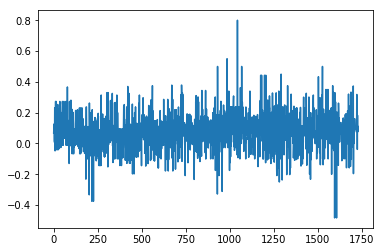

In [72]:
plt.plot(np.array(result)[:, 0])

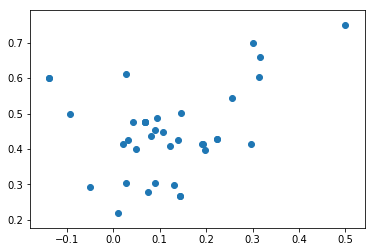

In [57]:
x, y = np.array(result).T
plt.scatter(x, y)

In [35]:
result = []
for tweet, date in data[["tweet", "date"]].values:
    if "http" not in tweet:
        continue
    try:
        url_start = tweet.find("http")
        url_end = tweet.find(" ", url_start)
        url = tweet[url_start : url_end]
        print(url)
        article = newspaper.Article(url)
        article.download()
        article.parse()
        article.nlp()
        cur_vectors = np.array([model[x] if x in model else np.zeros(300) for x in article.keywords])
        result.append(np.mean(cur_vectors, axis=0))
    except KeyboardInterrupt:
        raise
    except:
        pass

https://nyti.ms/340DqOn
https://nyti.ms/39lcxWs
https://nyti.ms/2UQNxBo
https://nyti.ms/33W5Itp
https://nyti.ms/2QTMKhz
https://nyti.ms/2UuuaPz
https://nyti.ms/2QRCmXI
https://nyti.ms/2UQNxBo 

Here’s
https://twitter.com/i/moments/1244311824423682050 
https://nyti.ms/2WYLSfo
https://nyti.ms/2WYLSfo 
https://nyti.ms/2WYLSfo 
https://nyti.ms/2w0GihK
https://nyti.ms/33VqOrR
https://nyti.ms/2xywoUI
https://nyti.ms/3dCIZH4
https://nyti.ms/3dCWdnn 
https://nyti.ms/2UOKDwG
https://nyti.ms/2wJ9Ala
https://nyti.ms/2w0rD6c
https://nyti.ms/3an6ty1
https://nyti.ms/39oep0B
https://nyti.ms/3aqNPoR 
https://nyti.ms/39q3i7p
https://nyti.ms/2UrBbAH
https://nyti.ms/2vTnSzg
https://nyti.ms/2Us8N1h 
🗽
https://nyti.ms/2R9uEbR
https://nyti.ms/2WMi2L5
https://nyti.ms/2JoGgmI
https://nyti.ms/2WQtkhC
https://nyti.ms/39wwxWp
https://nyti.ms/2WT4hdE 
https://nyti.ms/2xuyHs4
https://nyti.ms/33SZFpg
https://nyti.ms/2QVX8Wm
https://nyti.ms/3bxGl3z
https://nyti.ms/3ar2UqD
https://nyti.ms/2UHmhVL
https://nyti.ms/2UWT

Building prefix dict from /Users/ocksumoron/miniconda3/lib/python3.7/site-packages/jieba/dict.txt ...
Dumping model to file cache /var/folders/hm/g_mhmgjj4_d0jxd28ngnf7yr0000gp/T/jieba.cache
Loading model cost 2.0769143104553223 seconds.
Prefix dict has been built succesfully.


https://nyti.ms/2QS4ZUQ
https://nyti.ms/2WSvpt9
https://nyti.ms/2JiqZUs
https://nyti.ms/2WRpo08
https://nyti.ms/3arzloF
https://nyti.ms/3bu2TCc
https://nyti.ms/3arIb66
https://nyti.ms/39rAXgW
https://nyti.ms/2UPvFXA 
https://nyti.ms/3dBMgqo
https://nyti.ms/33S28QZ
https://nyti.ms/2UMwDUn
https://nyti.ms/3bzvrun
https://nyti.ms/2UIUt3h
https://nyti.ms/3apCF3H
https://nyti.ms/39u6AGK
https://nyti.ms/2WLUqX8
https://nyti.ms/2Upan3H 
https://nyti.ms/2Uo8CnC
https://nyti.ms/39pujry
https://nyti.ms/3bzKBzK 
https://nyti.ms/2xBf5T1
https://nyti.ms/2UGeDuI
https://nyti.ms/2QPE5wG
https://nyti.ms/2yjfQAR
https://nyti.ms/39sbd40
https://nyti.ms/39n1dcl
https://nyti.ms/3bz3fYi
https://nyti.ms/39lvmIZ
https://nyti.ms/2Ush3hQ
https://nyti.ms/2xxRX7U
https://nyti.ms/2xxRX7U 
https://nyti.ms/2UnC2Cm
https://nyti.ms/33U3z1u
https://nyti.ms/2Jkz5Mi
https://nyti.ms/39pb1m8
https://nyti.ms/2Uo4xj6
https://nyti.ms/33U2mqY
https://nyti.ms/3auR3YA


In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x, y = pca.fit_transform(result).T

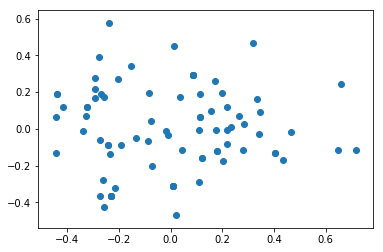

In [43]:
plt.scatter(x, y)

In [56]:
for tweet, date in data[["tweet", "date"]].values:
    if "WHO" in tweet or "corona" in tweet:
        print(tweet, date)

BREAKING: 'Six months or more' before UK returns to normal from coronavirus crisis https://trib.al/fcyCt8J  2020-03-29
BREAKING: All parts of UK put on 'emergency footing' against coronavirus crisis https://trib.al/igcMV5O  2020-03-29
BREAKING: NHS doctor, 55, dies after testing positive for coronavirus https://trib.al/yHcEpnn  2020-03-29
BREAKING: Hull Trains suspends all services to 'protect business' amid coronavirus crisis https://trib.al/QbJxj5s  2020-03-29
BREAKING: Another 209 dead as UK coronavirus death toll jumps to 1,228 https://trib.al/s6C74U8  2020-03-29
BREAKING: Spain's coronavirus death toll reaches 6,528 after 838 more people die https://trib.al/Pp56zLL  2020-03-29
After she pulled over, a frightened pensioner opened his door and grabbed her arm in desperation before telling her he feared he had coronavirus https://trib.al/DlSy77L  2020-03-28
BREAKING: Italy’s coronavirus death toll passes 10,000 as almost 900 more die in a day https://trib.al/W8sxMJF  2020-03-28
BREAK

In [25]:
panic_score_wsj = []
peace_score_wsj = []

In [19]:
panic_score_nyt = []
peace_score_nyt = []

In [18]:
model.similarity('panic', 'peace')

0.066477515

In [39]:
from datetime import datetime

timestamp = 1575158405
dt_object = datetime.fromtimestamp(timestamp)

In [52]:
covid_start = min(all_times_nyt)
covid_end = max(all_times_nyt)

In [68]:
covid_end

1586025604000

In [56]:
all_times_nyt_covid_str = [datetime.fromtimestamp(int(timestamp // 1000)).strftime("%d %b %Y") 
                           for timestamp in np.linspace(covid_start, covid_end, 20)]

In [42]:
dt_object.strftime("%d %b %Y")

'01 Dec 2019'

In [20]:
data = pd.read_csv("data/nytimes_covid.csv").sort_values("created_at")

In [ ]:
dates = []

In [26]:
for summary in all_sum_wsj:
    cur_panic_score = np.mean([model.similarity('panic', word) if word in model else 0 for word in summary.split()])
    cur_peace_score = np.mean([model.similarity('peace', word) if word in model else 0 for word in summary.split()])
    panic_score_wsj.append(cur_panic_score)
    peace_score_wsj.append(cur_peace_score)

/Users/ocksumoron/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/ocksumoron/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [141]:
def exponential_smoothing(data, alpha):
    output = [data[0]]
    for val in data:
        if np.isnan(val):
            output.append(output[-1])
        else:
            output.append(output[-1] * alpha + val * (1 - alpha))
    return output

In [235]:

SMALL_SIZE = 15
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# set tick width
plt.rcParams['xtick.major.size'] = 20
plt.rcParams['xtick.major.width'] = 4
plt.rcParams['xtick.minor.size'] = 10
plt.rcParams['xtick.minor.width'] = 2

In [76]:
all_times_wsj[-10:]

[1585990808000,
 1586006300000,
 1586007009000,
 1586007906000,
 1586010605000,
 1586011504000,
 1586014203000,
 1586015105000,
 1586016903000,
 1586021412000]

In [82]:
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


In [109]:
def return_score(model, reference_word, summaries):
    result = []
    for summary in summaries:
        words = [word for word in summary if word not in stop_words]
        cur_score = np.mean([model.similarity(reference_word, word) if word in model else 0 for word in words])
#         if cur_score is np.nan:
#             if len(result) == 0:
#                 result.append(0)
#             else:
#                 result.append(result[-1])
#         else:
        result.append(cur_score)
    return result

In [110]:
panic_score_nyt_func2 = return_score(model, 'panic', all_sum_nyt)

In [149]:
times_ticks = np.linspace(covid_start, covid_end, 15)
times_covid_str = [datetime.fromtimestamp(int(timestamp // 1000)).strftime("%d %b %Y") 
                   for timestamp in times_ticks]

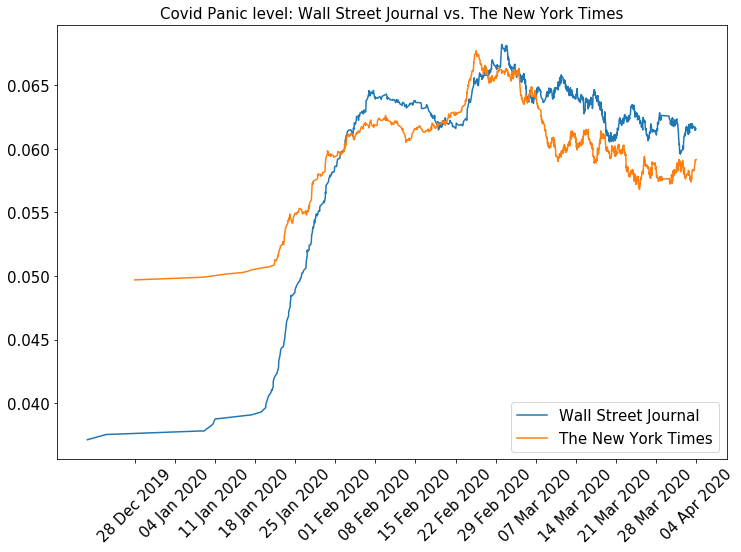

In [150]:
plt.figure(figsize=(12, 8))
plt.title("Covid Panic level: Wall Street Journal vs. The New York Times")
plt.plot(all_times_wsj, exponential_smoothing(panic_score_wsj, 0.99)[1:], label="Wall Street Journal")
plt.plot(all_times_nyt, exponential_smoothing(panic_score_nyt, 0.99)[1:], label="The New York Times")
plt.xticks(ticks=times_ticks, labels=times_covid_str)
plt.xticks(rotation=45)
plt.savefig("covid_panic_levels.pdf")
plt.legend(loc='lower right')
plt.show()

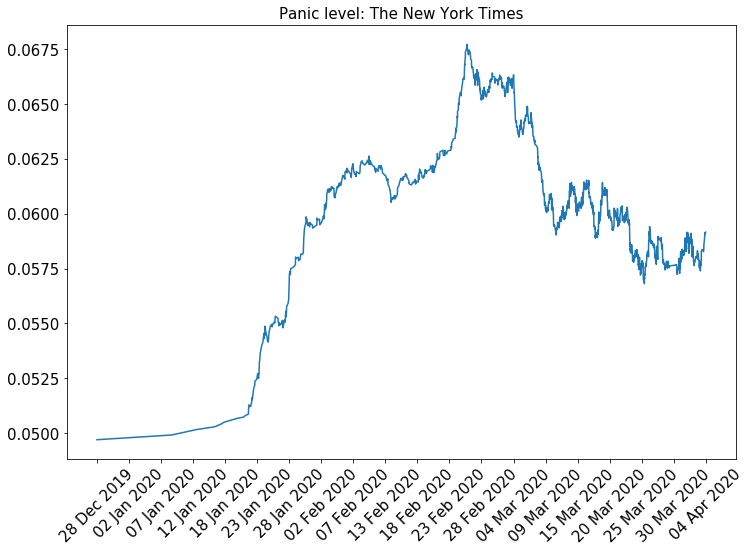

In [127]:
plt.figure(figsize=(12, 8))
plt.title("Panic level: The New York Times")
plt.xticks(ticks=np.linspace(covid_start, covid_end, 20), labels=all_times_nyt_covid_str)
plt.xticks(rotation=45)
plt.savefig("NYT_covid_panic.pdf")
plt.show()

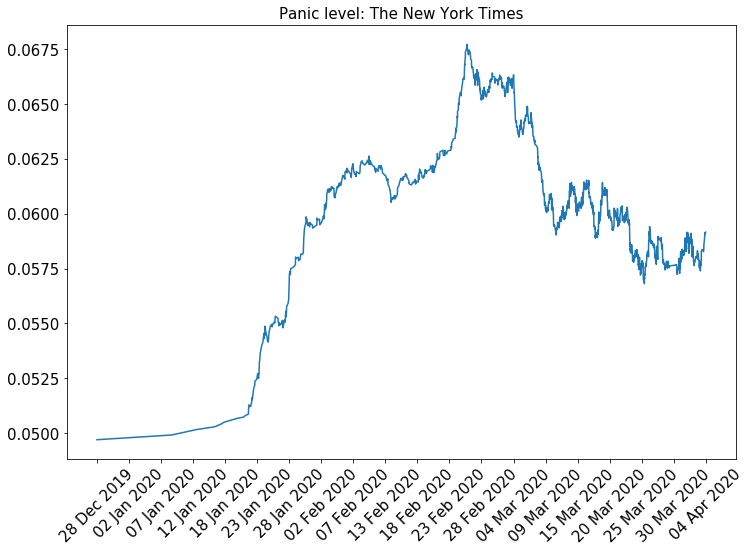

In [97]:
plt.figure(figsize=(12, 8))
plt.title("Panic level: The New York Times")
plt.plot(all_times_nyt, exponential_smoothing(panic_score_nyt, 0.99)[1:])
plt.xticks(ticks=np.linspace(covid_start, covid_end, 20), labels=all_times_nyt_covid_str)
plt.xticks(rotation=45)
plt.savefig("NYT_covid_panic.pdf")
plt.show()

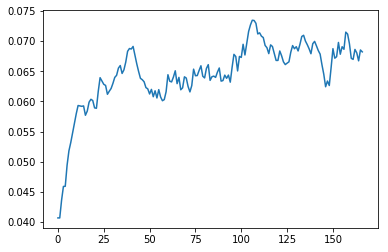

In [154]:
plt.plot(exponential_smoothing(panic_score, 0.9))

In [ ]:
i = 0
for tweet, date in data[["tweet", "date"]].values:
    if "http" not in tweet:
        continue
    if all(x not in tweet for x in ["virus", "corona", "WHO", "covid", "ncov", "wuhan"]):
        continue
    try:
        url_start = tweet.find("http")
        url_end = tweet.find(" ", url_start)
        url = tweet[url_start : url_end]
        print(tweet, date)
        article = newspaper.Article(url)
        article.download()
        article.parse()
        article.nlp()
        all_texts_wsj.append(article.summary)
#         testimonial = TextBlob(article.summary)
#         result.append([testimonial.sentiment.polarity, testimonial.sentiment.subjectivity])
    except KeyboardInterrupt:
        raise
    except:
        pass

In [176]:
len(panic_score_nyt)

1737

In [177]:
len(all_times_nyt)

3258

In [182]:
len(all_texts_nyt)

3258

In [114]:
panic_score_nyt = []
peace_score_nyt = []
for article in all_texts_nyt:
    words = [word for word in article.summary.split() if word not in stop_words]
    cur_panic_score = np.mean([model.similarity('panic', word) if word in model else 0 
                               for word in words])
    
    cur_peace_score = np.mean([model.similarity('peace', word) if word in model else 0 
                               for word in words])
    if cur_panic_score is np.nan:
        panic_score_nyt.append(panic_score_nyt[-1])
    else:
        panic_score_nyt.append(cur_panic_score)
    if cur_peace_score is np.nan:
        peace_score_nyt.append(peace_score_nyt[-1])
    else:
        peace_score_nyt.append(cur_peace_score)

In [124]:
panic_score_nyt = []
peace_score_nyt = []
for article in all_texts_nyt:
    words = [word for word in article.summary.split() if word not in stop_words]
    cur_panic_score = np.mean([model.similarity('panic', word) if word in model else 0 
                               for word in words])
    
    cur_peace_score = np.mean([model.similarity('peace', word) if word in model else 0 
                               for word in words])
    if cur_panic_score is np.nan:
        panic_score_nyt.append(panic_score_nyt[-1])
    else:
        panic_score_nyt.append(cur_panic_score)
    if cur_peace_score is np.nan:
        peace_score_nyt.append(peace_score_nyt[-1])
    else:
        peace_score_nyt.append(cur_peace_score)

In [125]:
panic_score_wsj = []
peace_score_wsj = []
for article in all_texts_wsj:
    words = [word for word in article.summary.split() if word not in stop_words]
    cur_panic_score = np.mean([model.similarity('panic', word) if word in model else 0 
                               for word in words])
    
    cur_peace_score = np.mean([model.similarity('peace', word) if word in model else 0 
                               for word in words])
    if cur_panic_score is np.nan:
        panic_score_wsj.append(panic_score_wsj[-1])
    else:
        panic_score_wsj.append(cur_panic_score)
    if cur_peace_score is np.nan:
        peace_score_wsj.append(peace_score_wsj[-1])
    else:
        peace_score_wsj.append(cur_peace_score)

In [171]:
panic_score_wsj_h1n1 = []
peace_score_wsj_h1n1 = []
for article in all_texts_wsj_h1n1:
    words = [word for word in article.summary.split() if word not in stop_words]
    cur_panic_score = np.mean([model.similarity('panic', word) if word in model else 0 
                               for word in words])
    
    cur_peace_score = np.mean([model.similarity('peace', word) if word in model else 0 
                               for word in words])
    if cur_panic_score is np.nan:
        panic_score_wsj_h1n1.append(panic_score_wsj_h1n1[-1])
    else:
        panic_score_wsj_h1n1.append(cur_panic_score)
    if cur_peace_score is np.nan:
        peace_score_wsj_h1n1.append(peace_score_wsj_h1n1[-1])
    else:
        peace_score_wsj_h1n1.append(cur_peace_score)

/Users/ocksumoron/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/ocksumoron/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [172]:
all_texts_nyt[0].summary

'Shahid set out with them but eventually walked away.\nEarly this month, Shahid died in the front room of his house, holding Camellia’s hand.\nIt was Partition that ruined his mother, set her on the course toward the ruined palace, Shahid had told me.\nThey took on new identities: Farhad became Princess Sakina, occasionally Princess Alexandrina; Mickey became Prince Ali Raza, and later called himself Prince Cyrus.\nHe refused to answer questions about his past; it was one of the essential themes of our friendship.'

In [102]:
all_sum_nyt[0]

'Shahid set out with them but eventually walked away.\nEarly this month, Shahid died in the front room of his house, holding Camellia’s hand.\nIt was Partition that ruined his mother, set her on the course toward the ruined palace, Shahid had told me.\nThey took on new identities: Farhad became Princess Sakina, occasionally Princess Alexandrina; Mickey became Prince Ali Raza, and later called himself Prince Cyrus.\nHe refused to answer questions about his past; it was one of the essential themes of our friendship.'

In [246]:
events = {}
events["31/12/2019"] = "Chine reports first cluster \n of 41 patients with \n a mysterious pneumonia"
events["11/01/2020"] = "First death in China"
events["20/01/2020"] = "First US case"
events["30/01/2020"] = "WHO declares global \n public health emergency"
# events["19/02/2020"] = "Iran Outbreak"
events["21/02/2020"] = "Italy outbreak"
events["29/02/2020"] = "1st death in US soil"
# events["08/03/2020"] = "Lockdown in Italy"
events["11/03/2020"] = "WHO declares it a pandemic"
# events["13/03/2020"] = "US National emergency declared"
events["23/03/2020"] = "21000 cases in NYC"
events["31/03/2020"] = "80% of Americans in lockdown"

In [247]:
events_new = {}
for key, value in events.items():
    events_new[int(datetime.strptime(key, '%d/%m/%Y').timestamp() * 1000)] = value

In [248]:
events_new.keys()

dict_keys([1577739600000, 1578690000000, 1579467600000, 1580331600000, 1582232400000, 1582923600000, 1583874000000, 1584910800000, 1585602000000])

In [249]:

SMALL_SIZE = 15
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# set tick width
plt.rcParams['xtick.major.size'] = 20
plt.rcParams['xtick.major.width'] = 4
plt.rcParams['xtick.minor.size'] = 10
plt.rcParams['xtick.minor.width'] = 2

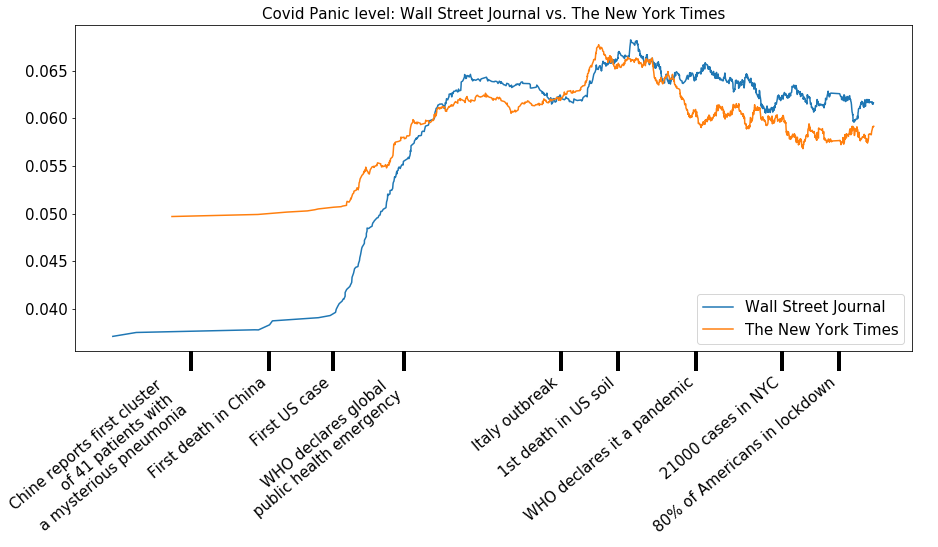

In [252]:
plt.figure(figsize=(15, 6))
plt.title("Covid Panic level: Wall Street Journal vs. The New York Times")
plt.plot(all_times_wsj, exponential_smoothing(panic_score_wsj, 0.99)[1:], label="Wall Street Journal")
plt.plot(all_times_nyt, exponential_smoothing(panic_score_nyt, 0.99)[1:], label="The New York Times")
plt.xticks(ticks=list(events_new.keys()), labels=list(events_new.values()))
plt.xticks(rotation=40)
plt.xticks(ha="right")
plt.savefig("covid_panic_levels.pdf")
plt.legend(loc='lower right')
plt.show()

In [282]:
crisis_score_nyt = []
for article in all_texts_nyt[:10]:
    words = [word for word in article.summary.split() if word not in stop_words]
    cur_crisis_score = np.mean([model.similarity('quarantine', word) if word in model else 0 
                               for word in words])
    if np.isnan(cur_panic_score):
        crisis_score_nyt.append(crisis_score_nyt[-1])
    else:
        crisis_score_nyt.append(cur_crisis_score)
    print(crisis_score_nyt[-1])

0.018856943358384472
0.10746541692905369
0.07771257706016013
0.0883625038817676
0.0883625038817676
0.09112836721760686
0.07870515588865601
0.09044121952727437
0.09044121952727437
0.08049829682865066


In [292]:
def return_score(model, reference_word, summaries):
    result = []
    for summary in summaries:
        words = [word for word in summary.split() if word not in stop_words]
        cur_score = np.mean([model.similarity(reference_word, word) if word in model else 0 
                             for word in words])
#         if cur_score is np.nan:
#             if len(result) == 0:
#                 result.append(0)
#             else:
#                 result.append(result[-1])
#         else:
        result.append(cur_score)
    return result

In [307]:
score_nyt = return_score(model, 'health', all_sum_nyt)


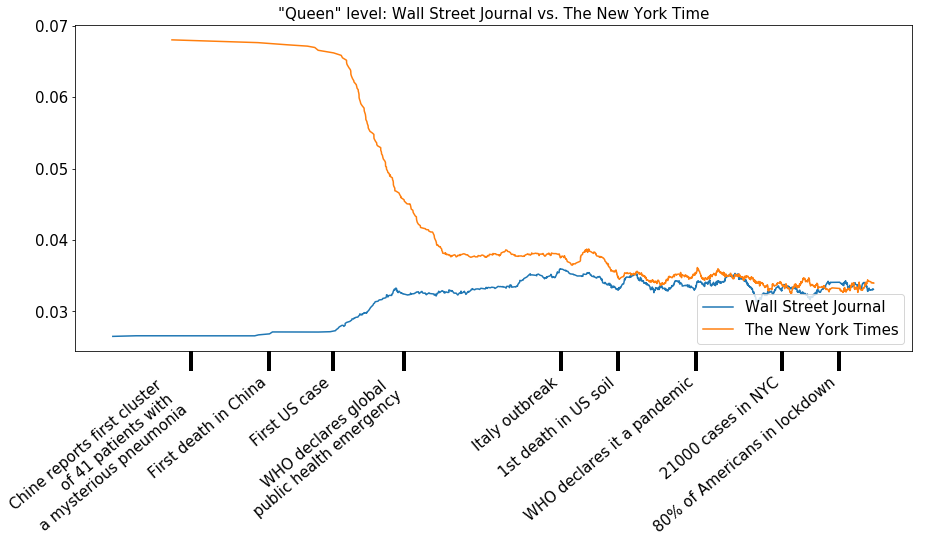

In [331]:
plt.figure(figsize=(15, 6))
word = 'queen'
plt.title(f'"{word.capitalize()}" level: Wall Street Journal vs. The New York Time')
plt.plot(all_times_wsj, 
         exponential_smoothing(return_score(model, 
                                            word, 
                                            all_sum_wsj), 0.99)[1:], 
         label="Wall Street Journal")
plt.plot(all_times_nyt, 
         exponential_smoothing(return_score(model, 
                                            word, 
                                            all_sum_nyt), 0.99)[1:], 
         label="The New York Times")
plt.xticks(ticks=list(events_new.keys()), labels=list(events_new.values()))
plt.xticks(rotation=40)
plt.xticks(ha="right")
plt.savefig("covid_panic_levels.pdf")
plt.legend(loc='lower right')
plt.show()